In [ ]:
!pip install pandas 
!pip install numpy 
!pip install matplotlib 
!pip install seaborn 
!pip install os 

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

import seaborn as sns 
import os 

In [ ]:
cwd = os.getcwd() 
files = os.listdir(cwd)
print('Files in %r: %s' %(cwd, files))

In [4]:
data = pd.read_csv("../Datasets/netflix_titles.csv")
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
print(f"Total rows in dataset: {data.shape[0]}") 
print(f"Total columns in dataset: {data.shape[1]}") 
print(f"Number of duplicates in dataset: {data.duplicated().sum()}")
print(f"\nSeries with null values:\n{data.isnull().sum()}")

Total rows in dataset: 7787
Total columns in dataset: 12
Number of duplicates in dataset: 0

Series with null values:
show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [7]:
data[data['director'].isnull()].head()
# len(data[(data['director'].isnull()) & (data['type']=='Movie')])
# titles without director appear to be predominately TV Shows, with a few exceptions (163)
data['director'] = data['director'].replace(np.nan, 'No Data')

#fill missing cast data with 'No Data'
data['cast'] = data['cast'].fillna('No Data')

#convert date_added to datetime and fill NaN values with most common date added
data[data['date_added'].isnull()].head()
#Friends, Frasier, Parts Unknown, all once very popular TV Shows, do not have a date_added
data['date_added'] = pd.to_datetime(data['date_added']) 
data['date_added'] = data['date_added'].fillna(data['date_added'].mode()[0])

#create additional date_added columns for analysis later on 
data['month_added'] = data['date_added'].dt.month
data['month_added_name'] = data['date_added'].dt.month_name()
data['year_month_added'] = data['date_added'].dt.to_period('M')
data['year_added'] = data['date_added'].dt.year

In [8]:
#fill missing country values with most common country in dataset 
data['country'] = data['country'].fillna(data['country'].mode()[0])
data['country'].value_counts()
data['country'] = data['country'].apply(lambda x: x.split(',')[0])

In [9]:
#convert movie duration to integer 
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_added_name,year_month_added,year_added
0,s1,TV Show,3%,No Data,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,8,August,2020-08,2020
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12,December,2016-12,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",12,December,2018-12,2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",11,November,2017-11,2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,January,2020-01,2020


In [10]:
data.rating.isnull().sum()
#now to take care of NaN ratings 
data[data['rating'].isnull()]
data.rating.value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [11]:
#only 7 title to replace, so I'll do my best to replace these manually with information from IMDB
# index | title | rating
# 67 13th Not Rated
# 2359 Gargantia TV-14
# 3660 Little Lunch TV-MA
# 3736 LCK: 2017 TV-MA
# 3737 LCK: Hilarious Not Rated
# 3738 LCK: Live @ Comedy Store Not Rated
# 4323 My Honor Was My Loyalty PG-13

In [12]:
ratings_replacements = {
    67: 'NR', 
    2359: 'TV-14', 
    3660: 'TV-MA', 
    3736: 'TV-MA', 
    3737: 'NR',
    3738: 'NR',
    4323: 'PG-13'
}

for id, rating in ratings_replacements.items():
    data.iloc[id, 8] = rating

In [13]:
#check to see if there are any remaining null values or dtypes 
# that I'd like to manipulate before further analysis
print(f"Null values in dataset:\n{data.isnull().sum()}\n") 
data.info()

Null values in dataset:
show_id             0
type                0
title               0
director            0
cast                0
country             0
date_added          0
release_year        0
rating              0
duration            0
listed_in           0
description         0
month_added         0
month_added_name    0
year_month_added    0
year_added          0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           7787 non-null   object        
 1   type              7787 non-null   object        
 2   title             7787 non-null   object        
 3   director          7787 non-null   object        
 4   cast              7787 non-null   object        
 5   country           7787 non-null   object        
 6   date_added        7787 non-null   datetime64[ns]
 7   release_year

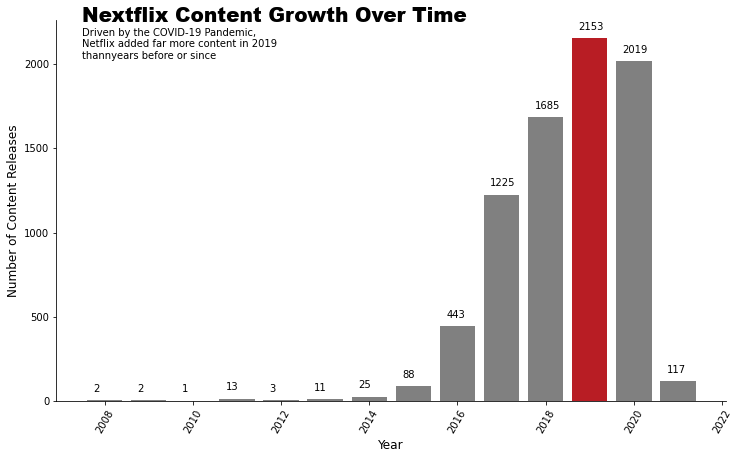

In [14]:
fig, ax = plt.subplots(figsize=(12, 7))

content_releases = data['year_added'].value_counts().to_frame('n_releases').reset_index().rename(columns={'index':'year'})

def set_bar_color(series, max_color='#B81D24', other_color='grey'): 
    max_val = series.max()
    color_list = [] 
    
    for item in series: 
        if item == max_val: 
            color_list.append(max_color)
        else: 
            color_list.append(other_color)
    return color_list

ax.bar(content_releases.year, content_releases.n_releases, color=set_bar_color(content_releases['n_releases']))

plt.xticks(rotation=60)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Content Releases", fontsize=12)

for p in ax.patches: 
    x = p.get_x() + p.get_width() - 0.655
    y = p.get_y() + p.get_height() + 50
    value = "{}".format(p.get_height())
    ax.text(x, y, value)


ax.text(2007.5, 2250, "Nextflix Content Growth Over Time", {'font':'Arial', 'fontsize':20, 'fontweight':'heavy'})
ax.text(2007.5, 2033, "Driven by the COVID-19 Pandemic,\nNetflix added far more content in 2019\nthannyears before or since")
sns.despine()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   rating    14 non-null     object
 1   n_titles  14 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 352.0+ bytes


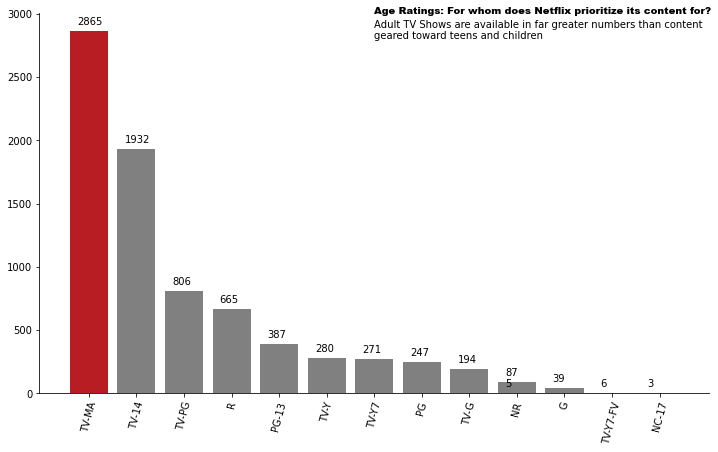

In [15]:
fig, ax = plt.subplots(figsize=(12, 7))

ratings_df = data['rating'].value_counts().to_frame('n_titles').reset_index().rename(columns={'index':'rating'})
#when replacing null values earlier, found that I used both NR and UR, so consolidated to NR 
ratings_df['rating'] = ratings_df['rating'].replace('UR', 'NR')
ratings_df.info()

def set_bar_color(series, max_color='#B81D24', other_color='grey'): 
    max_val = series.max()
    color_list = []
    
    for row in series: 
        if row == max_val: 
            color_list.append(max_color)
        else: 
            color_list.append(other_color)
    return color_list

ax.bar(ratings_df.rating, ratings_df.n_titles, color=set_bar_color(ratings_df['n_titles']))

for p in ax.patches: 
    x = p.get_x() + p.get_width() - 0.65
    y = p.get_y() + p.get_height() + 50
    value = "{}".format(p.get_height())
    ax.text(x, y, value)

ax.text(6, 3000, 'Age Ratings: For whom does Netflix prioritize its content for?', {'fontsize': 24, 'font':'Arial', 'fontweight':'heavy'})
ax.text(6, 2800, \
        'Adult TV Shows are available in far greater numbers than content\ngeared toward teens and children')
plt.xticks(rotation=75)
sns.despine()


In [16]:
ratings_df.index.value_counts()

age_ratings_dict = {
    'TV-MA': 'Adults',      
    'TV-14': 'Teens',       
    'TV-PG': 'Children',       
    'R': 'Adults',
    'PG-13':'Teens',      
    'TV-Y':'Children',        
    'TV-Y7':'Children',       
    'PG': 'Children',          
    'TV-G': 'Children',        
    'NR': 'Adults',          
    'G':'Children',           
    'TV-Y7-FV':'Children',    
    'UR':'Adults',          
    'NC-17':'Adults'       
}

Text(0.725, 3550, 'Once again, mature content reigns supreme on Netflix ')

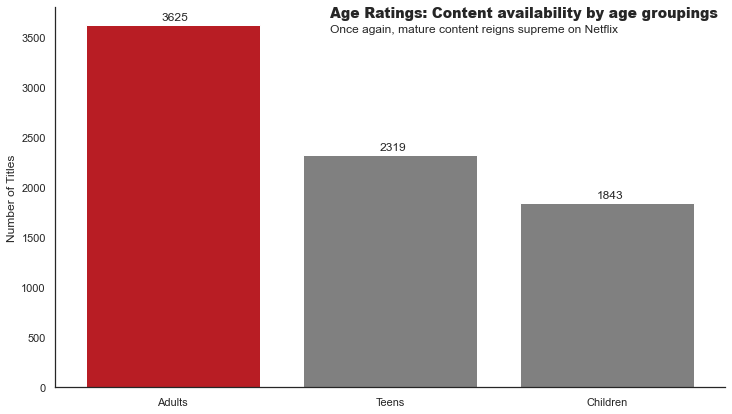

In [183]:
data['age_rating'] = data['rating'].replace(to_replace=age_ratings_dict)
data.age_rating.value_counts()
age_ratings_df = data['age_rating'].value_counts().to_frame('n_titles').reset_index().rename(columns={'index':'Age Grouping'})

fig, ax = plt.subplots(figsize=(12, 7))

color_list = ['#B81D24', 'grey', 'grey']

ax.bar(age_ratings_df['Age Grouping'], age_ratings_df.n_titles, color=color_list)

for p in ax.patches: 
    x = p.get_x() + p.get_width() - 0.45
    y = p.get_y() + p.get_height() + 50
    value = "{}".format(p.get_height())
    ax.text(x, y, value)

plt.ylabel('Number of Titles')
sns.despine()

ax.text(0.725, 3700, "Age Ratings: Content availability by age groupings", {'font':'Arial', 'fontsize': 14, 'fontweight':'heavy'})
ax.text(0.725, 3550, "Once again, mature content reigns supreme on Netflix ", {'font':'Arial', 'fontsize': 12, 'fontweight':'ultralight'})

c:\users\ana jones\pycharmprojects\jupyter\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


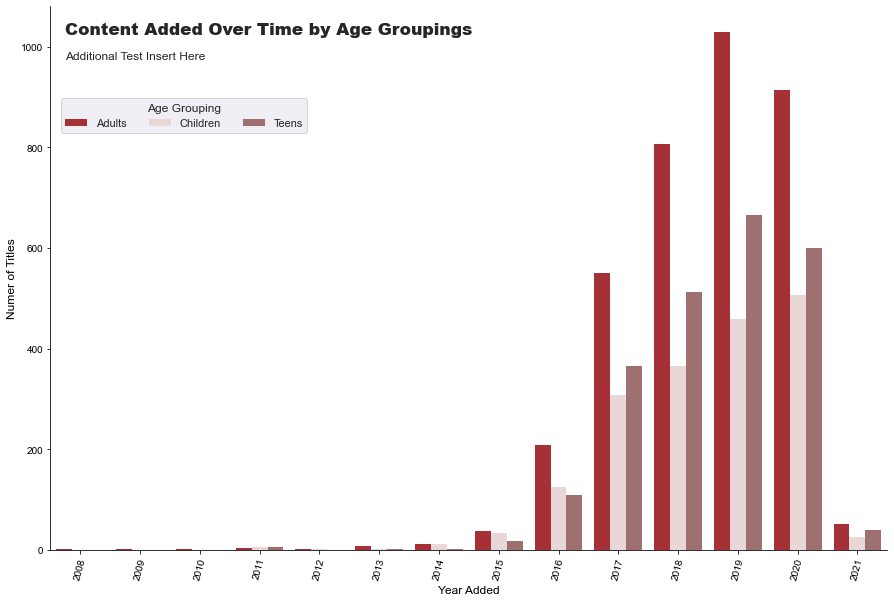

In [18]:
# with titles varying so much by age grouping, I wanted to see how content trends varied over time for these three

age_ratings_df_ot = data.groupby(['year_added', 'age_rating']).size().to_frame('n_titles').reset_index().sort_values('year_added', ascending=True)

fig, ax = plt.subplots(figsize=(15, 10))

color_list = ['#B81D24', '#ebd4d3', '#a66968']

sns.barplot(age_ratings_df_ot.year_added, age_ratings_df_ot.n_titles, hue=age_ratings_df_ot.age_rating, palette=color_list)

sns.set_theme(style='dark')
plt.xticks(rotation=75)
plt.xlabel("Year Added", fontsize=12)
plt.ylabel("Numer of Titles", fontsize=12)
ax.legend(loc=(0.0125, .7675), ncol=3, title='Age Grouping', fancybox=True)
ax.text(-0.25, 1025, "Content Added Over Time by Age Groupings", {'font':'Arial', 'fontsize': 17, 'fontweight':'heavy'})
ax.text(-0.25, 975, 'Additional Test Insert Here')
sns.despine() 

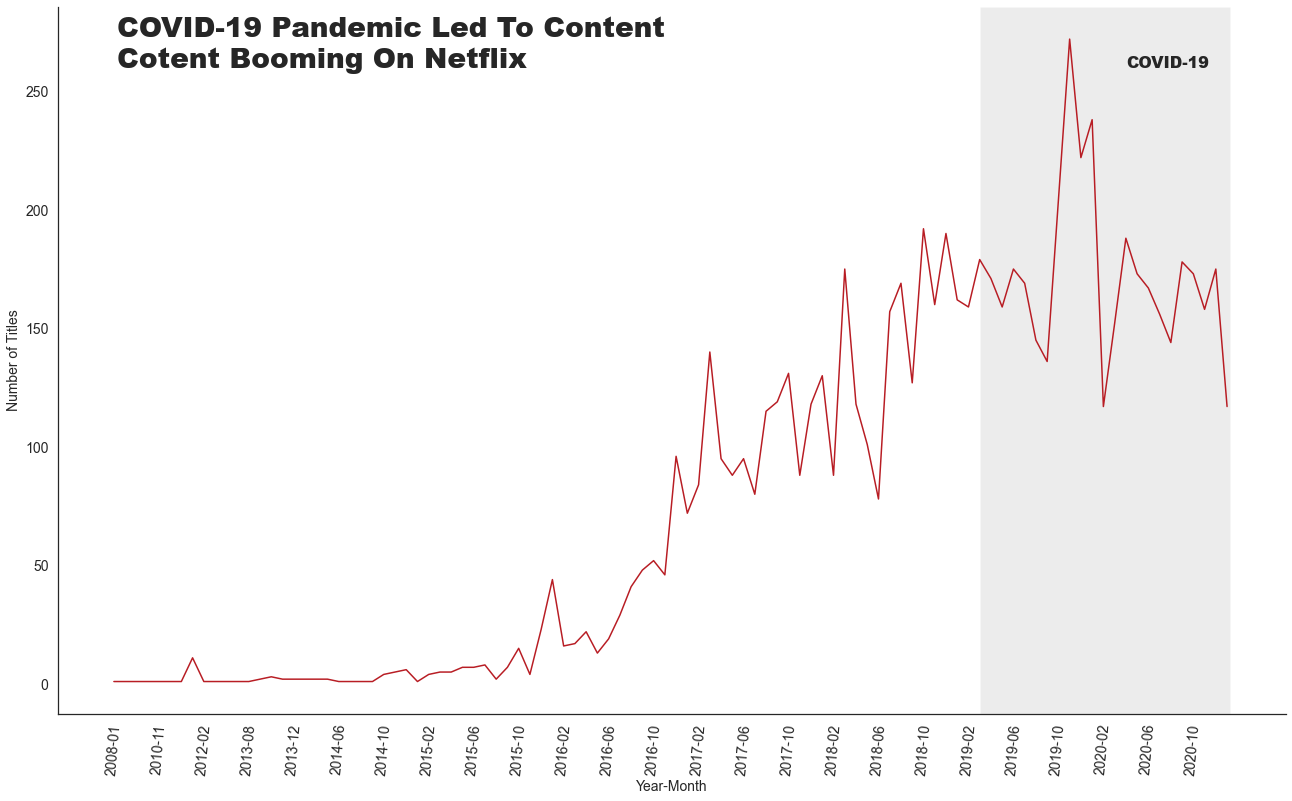

In [186]:
data['year_month_strf'] = pd.to_datetime(data['date_added']).dt.strftime('%Y-%m')
releases_ot_ym = data.groupby(['year_month_strf']).size().to_frame('n_titles').reset_index() 
releases_ot_ym = releases_ot_ym.sort_values(['year_month_strf', 'n_titles'], ascending=[True, False])

fig, ax = plt.subplots(figsize=(22, 13))
sns.set_theme(style='white')
ax.grid(False)

sns.lineplot(data=releases_ot_ym, x='year_month_strf', y='n_titles', color='#B81D24')

every_nth = 4
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
             
plt.xticks(rotation=85, fontsize=14)
plt.yticks(fontsize=14) 
plt.xlabel("Year-Month", fontsize=14)
plt.ylabel("Number of Titles", fontsize=14)

ax.text(0.25, 260, "COVID-19 Pandemic Led To Content\nCotent Booming On Netflix", {'font':'Arial', 'fontsize':28, 'fontweight':'heavy'})
plt.axvspan(77, 99.25, facecolor='grey', alpha=0.15)
ax.text(90, 260, "COVID-19", {'font':'Arial','fontweight':'heavy', 'fontsize':16})
sns.despine()

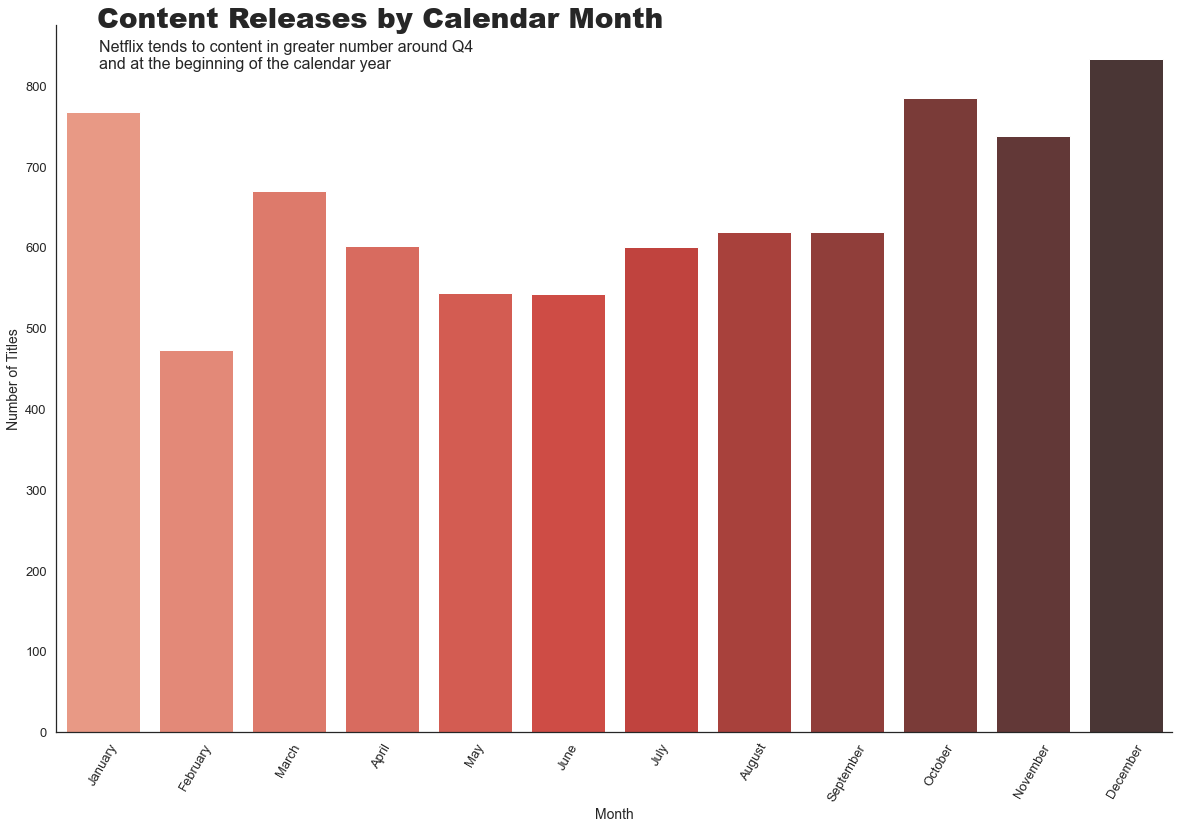

In [180]:
releases_ot_month_name = data['month_added_name'].value_counts().reset_index().rename(columns={'index':'Month Name',\
                                                                                              'month_added_name':'n_titles'})
releases_ot_month_name

months_list = [
    'January', 
    'February', 
    'March', 
    'April', 
    'May', 
    'June', 
    'July', 
    'August', 
    'September', 
    'October', 
    'November', 
    'December'
]

pal = sns.set_palette('Reds_d', len(releases_ot_month_name['Month Name']))

plt.figure(figsize=(20, 13))

sns.barplot(data=releases_ot_month_name, x=releases_ot_month_name['Month Name'], y=releases_ot_month_name.n_titles\
            ,order=months_list, palette=pal)


plt.ylabel("Number of Titles", fontsize=14)
plt.xlabel("Month", fontsize=14)
plt.xticks(rotation=60, fontsize=13)
plt.yticks(fontsize=13)
plt.suptitle("Content Releases by Calendar Month", ha='center', fontweight='heavy', fontsize=28, x=0.35,y=0.90 )
plt.title("Netflix tends to content in greater number around Q4\nand at the beginning of the calendar year", {'fontweight':'normal', 'fontsize':16}, ha='left', x=0.03875, y=0.93)
sns.despine()


##### 

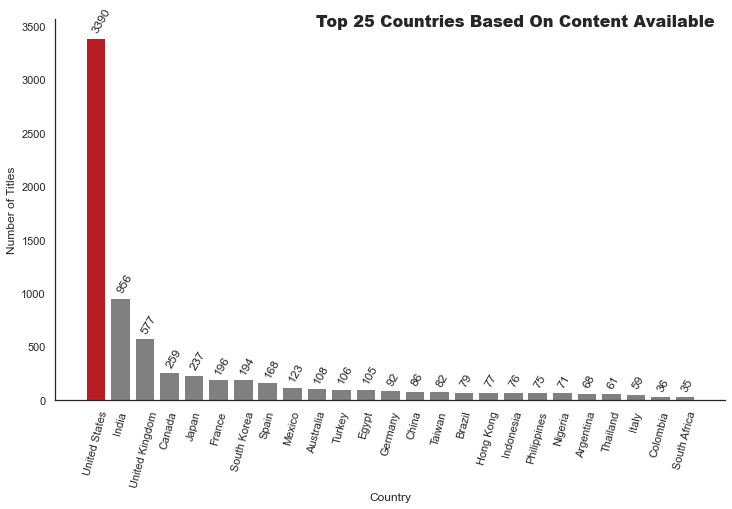

In [20]:
country_df = data.country.value_counts().to_frame('n_titles').reset_index().rename(columns={'index':'country'})[0:25]
fig, ax = plt.subplots(figsize=(12, 7)) 

ax.grid(False) 
sns.set_style('white')

def set_bar_color(series, max_color='#B81D24', other_color='grey'): 
    max_val = series.max() 
    color_list= []

    for row in series: 
        if row == max_val: 
            color_list.append(max_color)
        else:
            color_list.append(other_color)
    return color_list

ax.bar(data=country_df, x=country_df.country, height=country_df.n_titles, color=set_bar_color(country_df['n_titles']))

for p in ax.patches: 
    x = p.get_x() + p.get_width() - 0.6 
    y = p.get_y() + p.get_height() + 50 
    value = '{}'.format(p.get_height()) 
    ax.text(x, y, value, rotation=60)

ax.text(9, 3500, "Top 25 Countries Based On Content Available", {'font':'Arial', 'fontsize':16, 'fontweight':'heavy'})

plt.xlabel("Country", fontsize=12) 
plt.ylabel("Number of Titles", fontsize=12)

plt.xticks(rotation=75)

sns.despine()

## country_df = data.country.value_counts().to_frame('n_titles').reset_index().rename(columns={'index':'country'})[0:25]

fig, ax = plt.subplots(figsize=(12, 7))
ax.grid(False)
sns.set_style('white')

def set_bar_color(series, max_color='#B81D24', other_color='grey'): 
    max_val = series.max() 
    color_list= []
    
    for row in series: 
        if row == max_val: 
            color_list.append(max_color)
        else:
            color_list.append(other_color)
    return color_list


ax.bar(data=country_df, x=country_df.country, height=country_df.n_titles, color=set_bar_color(country_df['n_titles']))

for p in ax.patches: 
    x = p.get_x() + p.get_width() - 0.6
    y = p.get_y() + p.get_height() + 50
    value = '{}'.format(p.get_height())
    ax.text(x, y, value, rotation=60)

ax.text(9, 3500, "Top 25 Countries Based On Content Available", {'font':'Arial', 'fontsize':16, 'fontweight':'heavy'})

plt.xlabel("Country", fontsize=12)
plt.ylabel("Number of Titles", fontsize=12)

plt.xticks(rotation=75)

sns.despine()